In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Models (used for making prediction)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score





In [35]:
# Sample dataset
df=pd.read_csv("final_dataset")
df.head()

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,0.0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,...,44.0,7800.0,5.20,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,1.0,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,...,38.0,6000.0,4.23,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,2.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,...,31.0,7500.0,4.10,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,3.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,...,32.0,6700.0,3.90,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,4.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,...,35.0,7300.0,4.60,0.0,0.0,0.0,1.0,0.0,0.0,1


In [36]:
def calculate_eGFR(SCr,age):
    alpha = -0.37  # For males
    kappa = 0.9  
    eGFR = 141 * min(SCr / kappa, 1) ** alpha * max(SCr / kappa, 1) ** -1.209 * 0.993 ** age
    return eGFR
    

In [37]:
def predict_ckd_stage(eGFR):
    if eGFR >= 90:
        return 'Stage 1'
    elif eGFR >= 60:
        return 'Stage 2'
    elif eGFR >= 30:
        return 'Stage 3'
    elif eGFR >= 15:
        return 'Stage 4'
    else:
        return 'Stage 5'



In [38]:
age=[]
age+=[i for i in df['age']]
print(age)
print(len(age))

[48.0, 7.0, 62.0, 48.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0, 68.0, 68.0, 68.0, 40.0, 47.0, 47.0, 60.0, 62.0, 61.0, 60.0, 48.0, 21.0, 42.0, 61.0, 75.0, 69.0, 75.0, 68.0, 51.6, 73.0, 61.0, 60.0, 70.0, 65.0, 76.0, 72.0, 69.0, 82.0, 46.0, 45.0, 47.0, 35.0, 54.0, 54.0, 48.0, 11.0, 73.0, 60.0, 53.0, 54.0, 53.0, 62.0, 63.0, 35.0, 76.0, 76.0, 73.0, 59.0, 67.0, 67.0, 15.0, 46.0, 55.0, 44.0, 67.0, 45.0, 65.0, 26.0, 61.0, 46.0, 64.0, 55.9, 56.0, 5.0, 48.0, 67.0, 70.0, 56.0, 74.0, 45.0, 38.0, 48.0, 59.0, 70.0, 56.0, 70.0, 58.0, 50.0, 63.0, 56.0, 71.0, 73.0, 65.0, 62.0, 60.0, 65.0, 50.0, 56.0, 34.0, 71.0, 17.0, 76.0, 55.0, 65.0, 50.0, 55.0, 45.0, 54.0, 63.0, 65.0, 40.3, 61.0, 12.0, 47.0, 45.5, 51.1, 55.0, 60.0, 72.0, 54.0, 34.0, 43.0, 65.0, 72.0, 70.0, 71.0, 52.0, 75.0, 50.0, 5.0, 50.0, 70.0, 47.0, 48.0, 46.0, 45.0, 73.0, 41.0, 69.0, 67.0, 72.0, 41.0, 60.0, 57.0, 53.0, 60.0, 69.0, 65.0, 8.0, 76.0, 39.0, 55.0, 56.0, 50.0, 66.0, 62.0, 71.0, 59.0, 81.0, 62.0, 59.0, 46.0, 14.0, 60.0, 27.0, 3

In [42]:
SCr=[]
SCr+=[i for i in df['sc']]
SCr

[1.2,
 0.8,
 1.8,
 3.8,
 1.4,
 1.1,
 24.0,
 1.1,
 1.9,
 7.2,
 4.0,
 2.7,
 2.1,
 4.6,
 4.1,
 9.6,
 2.2,
 5.2,
 1.3,
 1.6,
 3.9,
 76.0,
 7.7,
 4.619999999999999,
 1.4,
 1.9,
 2.4,
 2.7,
 1.4,
 1.4,
 7.3,
 1.5,
 1.5,
 2.5,
 5.2,
 2.0,
 1.8,
 3.4,
 4.1,
 3.4,
 2.1,
 0.7,
 1.0,
 10.8,
 6.3,
 5.9,
 1.2,
 0.8,
 0.9,
 3.0,
 3.25,
 1.6,
 2.2,
 1.0,
 3.4,
 4.49,
 9.7,
 7.3,
 4.6,
 6.4,
 3.2,
 32.0,
 0.6,
 6.1,
 3.71,
 1.1,
 1.6,
 3.2299999999999995,
 3.3,
 1.1,
 0.7,
 3.3,
 1.3,
 6.7,
 6.7,
 0.7,
 8.5,
 3.2,
 3.2,
 1.8,
 2.8,
 2.4,
 1.9,
 1.0,
 15.0,
 1.5,
 1.9,
 2.9,
 2.2,
 1.4,
 3.2,
 1.7,
 3.6,
 5.6,
 1.6,
 1.1,
 2.7,
 2.2,
 6.5,
 1.2,
 0.9,
 4.4,
 2.1,
 10.2,
 2.0,
 11.5,
 6.1,
 2.8,
 1.0,
 1.9,
 2.0,
 4.4,
 1.2,
 1.6599999999999997,
 1.8,
 0.9,
 0.5,
 1.3,
 1.2,
 1.2,
 2.2,
 1.3,
 12.2,
 1.1,
 2.5,
 2.5,
 4.0,
 5.3,
 5.6,
 1.4,
 9.2,
 0.6,
 13.8,
 5.3,
 16.9,
 1.3,
 2.8,
 4.0,
 1.6,
 2.8,
 1.2,
 6.0,
 7.1,
 18.0,
 2.3,
 13.0,
 1.0,
 1.7,
 48.1,
 1.0,
 0.9,
 1.7,
 0.8,
 14.2,
 16.4,
 1.8,
 3

In [43]:
len(SCr)

500

In [44]:
eGFR=[]
for i in range(500):
    eGFR.append(calculate_eGFR(SCr[i],age[i]))
print(eGFR)
len(eGFR)

[71.07749408488438, 140.21364694868092, 39.45729007476052, 17.640214675087993, 57.76186201042843, 72.5787459417776, 1.6510940525635165, 93.46231071538003, 39.650267787584305, 7.864905135442309, 16.348209775672032, 23.998393541808344, 31.39670532508712, 12.166705215453534, 13.982715504214802, 6.085584899901673, 34.39726915606627, 12.158078507485003, 59.30559990320956, 45.49573171513138, 15.602901070943787, 0.43346055549915274, 7.510951326462056, 16.83760730702425, 61.53156317522505, 37.22111349748922, 25.434110424903633, 23.00793606521085, 48.80037379681061, 51.25997725201146, 7.811279737647296, 45.53015350465327, 49.534539805406325, 26.899471400996273, 10.344217863025827, 34.0137248339065, 35.7615829001731, 17.048500534223333, 13.884836495685299, 15.892004248461046, 36.64380893563008, 112.80250617478364, 89.23043000026922, 5.466541928753249, 9.17814682716166, 9.935681088416338, 71.07749408488438, 136.32869560985012, 84.43339510818039, 21.57812076379637, 20.575078147054942, 48.125656428

500

In [45]:
stages=[]
for i in range(500):
    stages.append(predict_ckd_stage(eGFR[i]))
print(stages)

['Stage 2', 'Stage 1', 'Stage 3', 'Stage 4', 'Stage 3', 'Stage 2', 'Stage 5', 'Stage 1', 'Stage 3', 'Stage 5', 'Stage 4', 'Stage 4', 'Stage 3', 'Stage 5', 'Stage 5', 'Stage 5', 'Stage 3', 'Stage 5', 'Stage 3', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 5', 'Stage 4', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 4', 'Stage 3', 'Stage 3', 'Stage 5', 'Stage 3', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 3', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 4', 'Stage 3', 'Stage 1', 'Stage 2', 'Stage 5', 'Stage 5', 'Stage 5', 'Stage 2', 'Stage 1', 'Stage 2', 'Stage 4', 'Stage 4', 'Stage 3', 'Stage 3', 'Stage 2', 'Stage 4', 'Stage 4', 'Stage 5', 'Stage 5', 'Stage 5', 'Stage 5', 'Stage 4', 'Stage 5', 'Stage 1', 'Stage 5', 'Stage 4', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 4', 'Stage 1', 'Stage 1', 'Stage 4', 'Stage 3', 'Stage 5', 'Stage 5', 'Stage 1', 'Stage 5', 'Stage 4', 'Stage 4', 'Stage 3', 'Stage 4', 'Stage 3', 'Stage 3', 'Stage 2', 'Stage 5', 'Stage 3', 'Stage 3', 'Stage 4', 'Stage 3', 'Stage 3', 'Stage 4'

In [46]:
df['stage'] = stages
df

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,stage
0,0,0.000000,48.000000,80.000000,1.020000,1.0,0.0,2.000000,1.000000,0.00000,...,7800.000000,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1,Stage 2
1,1,1.000000,7.000000,50.000000,1.020000,4.0,0.0,2.000000,1.000000,0.00000,...,6000.000000,4.230000,0.0,0.0,0.0,1.0,0.0,0.0,1,Stage 1
2,2,2.000000,62.000000,80.000000,1.010000,2.0,3.0,1.000000,1.000000,0.00000,...,7500.000000,4.100000,0.0,1.0,0.0,0.0,0.0,1.0,1,Stage 3
3,3,3.000000,48.000000,70.000000,1.005000,4.0,0.0,1.000000,0.000000,1.00000,...,6700.000000,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1,Stage 4
4,4,4.000000,51.000000,80.000000,1.010000,2.0,0.0,1.000000,1.000000,0.00000,...,7300.000000,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1,Stage 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,341.750627,61.988244,72.023511,1.021994,0.0,0.0,1.000000,1.000000,0.00000,...,6700.000000,6.340470,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 2
496,496,310.444134,30.652113,71.835681,1.020000,0.0,0.0,1.000000,1.000000,0.00000,...,7267.342725,5.354967,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 1
497,497,283.547044,51.580141,72.016549,1.020000,0.0,0.0,1.798345,1.798345,1.59669,...,8400.000000,5.819338,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 1
498,498,277.382779,52.437802,76.985649,1.024246,0.0,0.0,1.000000,1.000000,0.00000,...,9100.000000,5.969856,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 2


In [47]:
df=df.drop(['Unnamed: 0'],axis=1)

In [48]:
df=df.drop(['id'],axis=1)

In [49]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,stage
0,48.000000,80.000000,1.020000,1.0,0.0,2.000000,1.000000,0.00000,0.00000,121.000000,...,7800.000000,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1,Stage 2
1,7.000000,50.000000,1.020000,4.0,0.0,2.000000,1.000000,0.00000,0.00000,193.600000,...,6000.000000,4.230000,0.0,0.0,0.0,1.0,0.0,0.0,1,Stage 1
2,62.000000,80.000000,1.010000,2.0,3.0,1.000000,1.000000,0.00000,0.00000,423.000000,...,7500.000000,4.100000,0.0,1.0,0.0,0.0,0.0,1.0,1,Stage 3
3,48.000000,70.000000,1.005000,4.0,0.0,1.000000,0.000000,1.00000,0.00000,117.000000,...,6700.000000,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1,Stage 4
4,51.000000,80.000000,1.010000,2.0,0.0,1.000000,1.000000,0.00000,0.00000,106.000000,...,7300.000000,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1,Stage 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,61.988244,72.023511,1.021994,0.0,0.0,1.000000,1.000000,0.00000,0.00000,109.970611,...,6700.000000,6.340470,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 2
496,30.652113,71.835681,1.020000,0.0,0.0,1.000000,1.000000,0.00000,0.00000,121.860092,...,7267.342725,5.354967,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 1
497,51.580141,72.016549,1.020000,0.0,0.0,1.798345,1.798345,1.59669,1.59669,80.436407,...,8400.000000,5.819338,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 1
498,52.437802,76.985649,1.024246,0.0,0.0,1.000000,1.000000,0.00000,0.00000,124.122016,...,9100.000000,5.969856,0.0,0.0,0.0,1.0,0.0,0.0,0,Stage 2


In [50]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,stage
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.0,...,7800.0,5.20,1.0,1.0,0.0,1.0,0.0,0.0,1,Stage 2
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,193.6,...,6000.0,4.23,0.0,0.0,0.0,1.0,0.0,0.0,1,Stage 1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,7500.0,4.10,0.0,1.0,0.0,0.0,0.0,1.0,1,Stage 3
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,6700.0,3.90,1.0,0.0,0.0,0.0,1.0,1.0,1,Stage 4
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,7300.0,4.60,0.0,0.0,0.0,1.0,0.0,0.0,1,Stage 3


In [51]:
X=df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane',]]
y=df['stage']

In [52]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.000000,80.000000,1.020000,1.0,0.0,2.000000,1.000000,0.00000,0.00000,121.000000,...,15.400000,44.000000,7800.000000,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.000000,50.000000,1.020000,4.0,0.0,2.000000,1.000000,0.00000,0.00000,193.600000,...,11.300000,38.000000,6000.000000,4.230000,0.0,0.0,0.0,1.0,0.0,0.0
2,62.000000,80.000000,1.010000,2.0,3.0,1.000000,1.000000,0.00000,0.00000,423.000000,...,9.600000,31.000000,7500.000000,4.100000,0.0,1.0,0.0,0.0,0.0,1.0
3,48.000000,70.000000,1.005000,4.0,0.0,1.000000,0.000000,1.00000,0.00000,117.000000,...,11.200000,32.000000,6700.000000,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,51.000000,80.000000,1.010000,2.0,0.0,1.000000,1.000000,0.00000,0.00000,106.000000,...,11.600000,35.000000,7300.000000,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,61.988244,72.023511,1.021994,0.0,0.0,1.000000,1.000000,0.00000,0.00000,109.970611,...,15.356003,50.000000,6700.000000,6.340470,0.0,0.0,0.0,1.0,0.0,0.0
496,30.652113,71.835681,1.020000,0.0,0.0,1.000000,1.000000,0.00000,0.00000,121.860092,...,14.579718,47.265727,7267.342725,5.354967,0.0,0.0,0.0,1.0,0.0,0.0
497,51.580141,72.016549,1.020000,0.0,0.0,1.798345,1.798345,1.59669,1.59669,80.436407,...,14.618511,50.386761,8400.000000,5.819338,0.0,0.0,0.0,1.0,0.0,0.0
498,52.437802,76.985649,1.024246,0.0,0.0,1.000000,1.000000,0.00000,0.00000,124.122016,...,15.273924,41.753588,9100.000000,5.969856,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
y

0      Stage 2
1      Stage 1
2      Stage 3
3      Stage 4
4      Stage 3
        ...   
495    Stage 2
496    Stage 1
497    Stage 1
498    Stage 2
499    Stage 1
Name: stage, Length: 500, dtype: object

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
X_train.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [56]:
y_train.isnull().sum()

0

RANDOM FOREST

In [57]:
model = RandomForestClassifier(
    n_estimators=1,
    criterion='entropy',
    max_depth=2,
    min_samples_split=2,
    bootstrap=True,
    random_state=42,
    max_samples=None
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100

print(accuracy)
print("Classificaation Report\n",classification_report(y_test,y_pred))


56.99999999999999
Classificaation Report
               precision    recall  f1-score   support

     Stage 1       0.59      0.88      0.71        40
     Stage 2       0.00      0.00      0.00        22
     Stage 3       0.45      0.82      0.58        11
     Stage 4       0.00      0.00      0.00        11
     Stage 5       0.62      0.81      0.70        16

    accuracy                           0.57       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.39      0.57      0.46       100



SVM

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier

model = SVC(
    C=0.0006,
    kernel='linear',
    degree=2,
    gamma='scale',
    probability=False,
    tol=0.1,
    cache_size=100,
    max_iter=-1,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 64.0
              precision    recall  f1-score   support

     Stage 1       0.61      0.88      0.72        40
     Stage 2       0.38      0.14      0.20        22
     Stage 3       0.60      0.55      0.57        11
     Stage 4       0.60      0.55      0.57        11
     Stage 5       0.93      0.88      0.90        16

    accuracy                           0.64       100
   macro avg       0.62      0.60      0.59       100
weighted avg       0.61      0.64      0.60       100



DECISION TREE

In [59]:
model = DecisionTreeClassifier(
    criterion='gini',  
    max_depth=2,         
    min_samples_split=2,
    max_features=8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100

print("Accuracy :",accuracy)
print(classification_report(y_test, y_pred))

Accuracy : 63.0
              precision    recall  f1-score   support

     Stage 1       0.97      0.88      0.92        40
     Stage 2       0.70      0.95      0.81        22
     Stage 3       0.21      0.64      0.31        11
     Stage 4       0.00      0.00      0.00        11
     Stage 5       0.00      0.00      0.00        16

    accuracy                           0.63       100
   macro avg       0.38      0.49      0.41       100
weighted avg       0.57      0.63      0.58       100



RANDOM FOREST WITH RFECV

In [60]:
from sklearn.feature_selection import RFECV
model = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    max_depth=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42,
    max_samples=None
)
rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy') 

rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred) * 100

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 89.0
Classification Report:
               precision    recall  f1-score   support

     Stage 1       0.90      0.93      0.91        40
     Stage 2       0.75      0.82      0.78        22
     Stage 3       1.00      0.73      0.84        11
     Stage 4       1.00      0.91      0.95        11
     Stage 5       0.94      1.00      0.97        16

    accuracy                           0.89       100
   macro avg       0.92      0.88      0.89       100
weighted avg       0.90      0.89      0.89       100



DECISION TREE WITH RFECV

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report

model_dt = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=2, 
    min_samples_split=2, 
    min_samples_leaf=1,
    max_features=6,
    random_state=42
)

rfecv_dt = RFECV(estimator=model_dt, step=1, cv=10, scoring='accuracy')

rfecv_dt.fit(X_train, y_train)

selected_features_dt = X_train.columns[rfecv_dt.support_]

X_train_selected_dt = X_train[selected_features_dt]
X_test_selected_dt = X_test[selected_features_dt]

model_dt.fit(X_train_selected_dt, y_train)

y_pred_dt = model_dt.predict(X_test_selected_dt)

accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(selected_features_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Index(['rbc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'pcv', 'wc', 'rc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane'],
      dtype='object')
Decision Tree Accuracy: 56.99999999999999
Decision Tree Classification Report:
               precision    recall  f1-score   support

     Stage 1       0.60      0.95      0.74        40
     Stage 2       0.00      0.00      0.00        22
     Stage 3       0.31      0.36      0.33        11
     Stage 4       0.44      0.36      0.40        11
     Stage 5       0.73      0.69      0.71        16

    accuracy                           0.57       100
   macro avg       0.42      0.47      0.44       100
weighted avg       0.44      0.57      0.49       100



SVM WITH RFECV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import pandas as pd

model = SVC(
    C=0.1,
    kernel='linear',
    degree=2,
    gamma='scale',
    probability=False,
    tol=0.1,
    cache_size=100,
    max_iter=-1,
    random_state=42
)

rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')

rfecv.fit(X_train, y_train)

selected_features = X_train.columns[rfecv.support_]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100)
print(classification_report(y_test,y_pred))


RANDOM FOREST WITH UFS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

model_rf = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    max_depth=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42,
    max_samples=None
)

ufs = SelectKBest(score_func=f_classif, k=15)  # Specify the number of features you want to select

ufs.fit(X_train, y_train)

selected_features = X_train.columns[ufs.get_support()]

X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

model_rf.fit(X_train_selected, y_train)

y_pred_rf = model_dt.predict(X_test_selected)

accuracy_rf = accuracy_score(y_test, y_pred_dt) * 100

print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

SVM WITH UFS

In [ ]:
#SVM with UFS

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(
    C=0.0006,
    kernel='linear',
    degree=2,
    gamma='scale',
    probability=False,
    tol=0.001,
    cache_size=200,
    max_iter=-1,
    random_state=42
)

ufs = SelectKBest(score_func=f_classif, k=5)  
ufs.fit(X_train, y_train)

selected_features = X_train.columns[ufs.get_support()]

X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

svm_model.fit(X_train_selected, y_train)

y_pred_svm = svm_model.predict(X_test_selected)

accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

DECISION TREE WITH UFS

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

model_dt = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=2, 
    min_samples_split=4,  
    max_features="auto",
    random_state=42
)

ufs = SelectKBest(score_func=f_classif, k=5)  

ufs.fit(X_train, y_train)

selected_features = X_train.columns[ufs.get_support()]

X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

model_dt.fit(X_train_selected, y_train)

y_pred_dt = model_dt.predict(X_test_selected)

accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

ACCURACY GRAPH FOR MODELS WITHOUT ANY FEATURE SELECTION

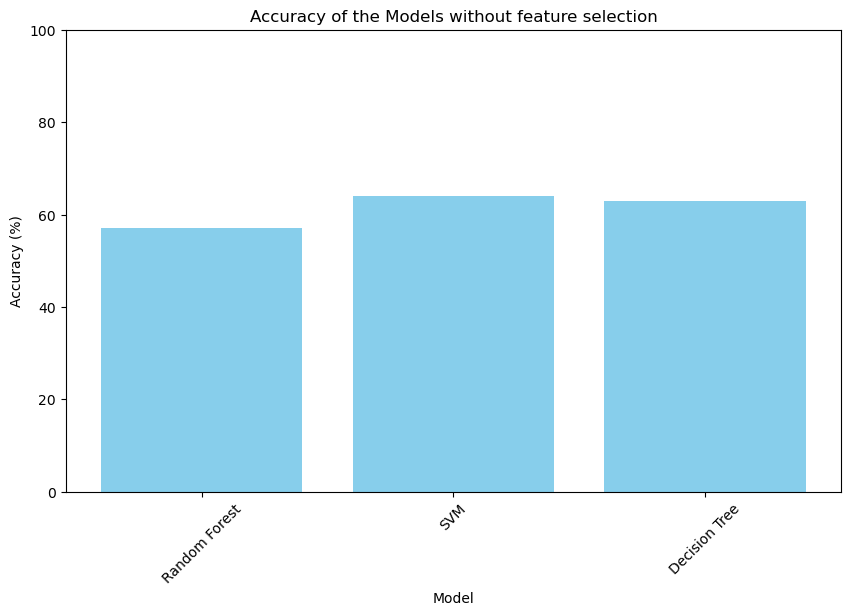

In [31]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'SVM','Decision Tree']

accuracies = [56.99,64.0,63.0]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of the Models without feature selection')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


ACCURACY GRAPH FOR MODELS WITH RFECV

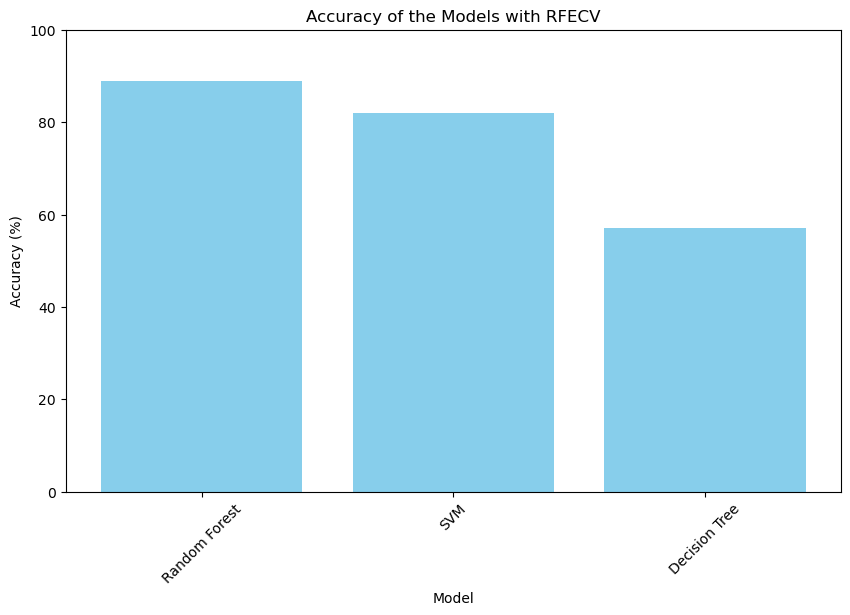

In [32]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'SVM','Decision Tree']

accuracies = [89.0,82.0,56.99]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of the Models with RFECV')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


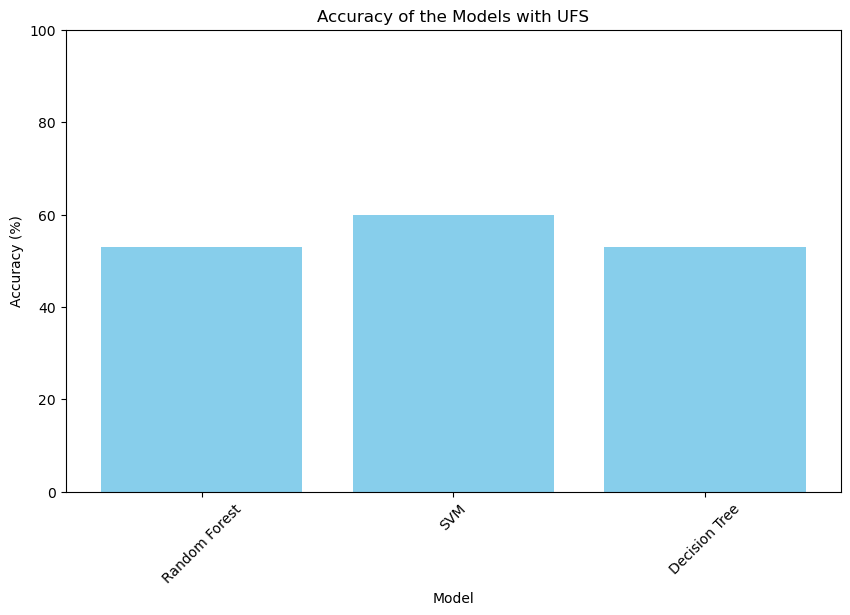

In [33]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'SVM','Decision Tree']

accuracies = [53.0,60.0,53.0]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of the Models with UFS')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()
